# Formula 1 Data Analysis with Azure by Yash Wadhawe

This project focuses on analyzing Formula 1 race data to gain insights into team and driver performance and develop predictive models for future races. I am using Azure services such as Azure Blob Storage, Azure Databricks, and Azure Machine Learning to collect, store, analyze, and visualize data from the Kaggle Formula 1 dataset.
This project is a part of Final Project Assignment for the course IST615 - Cloud Management
## Project Goals

- Collect and preprocess data from the Kaggle Formula 1 dataset
- Store data in Azure Blob Storage
- Use Azure Databricks to analyze and visualize data
- Develop predictive models using Azure Machine Learning

## Scope

The project will focus on the following aspects of Formula 1 race data:

- Race results: including finishing positions, lap times, and pit stops
- Driver standings: including points, wins, and podium finishes
- Team performance: including points, wins, and championship standings


In [0]:
# Setting up the storage account key and name from Azure
# storage_account_name = ""
# storage_account_key = ""

In [0]:
# Configuring the Spark
spark.conf.set(
    "fs.azure.account.key.{}.blob.core.windows.net".format(storage_account_name),
    storage_account_key
)

In [0]:
# Checking if the files are present in our blob
container_name = "f1datafiles"
folder_name = "f1data"  # Remove this line if there is no folder
files = dbutils.fs.ls("wasbs://{}@{}.blob.core.windows.net/{}".format(container_name, storage_account_name, folder_name))

for file in files:
    print(file.name)



GrandPrix_drivers_details_1950_to_2022.csv
GrandPrix_fastest-laps_details_1950_to_2022.csv
GrandPrix_races_details_1950_to_2022.csv


In [0]:
# Loading the csv files into spark dataframe

from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

driver_details_path = "wasbs://{}@{}.blob.core.windows.net/{}/GrandPrix_drivers_details_1950_to_2022.csv".format(container_name, storage_account_name, folder_name)
fastest_laps_path = "wasbs://{}@{}.blob.core.windows.net/{}/GrandPrix_fastest-laps_details_1950_to_2022.csv".format(container_name, storage_account_name, folder_name)
races_details_path = "wasbs://{}@{}.blob.core.windows.net/{}/GrandPrix_races_details_1950_to_2022.csv".format(container_name, storage_account_name, folder_name)

driver_details_spark_df = spark.read.csv(driver_details_path, header=True, inferSchema=True)
fastest_laps_spark_df = spark.read.csv(fastest_laps_path, header=True, inferSchema=True)
races_details_spark_df = spark.read.csv(races_details_path, header=True, inferSchema=True)

In [0]:
# Converting the spark dataframes to pandas dataframe
driver_details_df = driver_details_spark_df.toPandas()
fastest_laps_df = fastest_laps_spark_df.toPandas()
races_details_df = races_details_spark_df.toPandas()


In [0]:
display(driver_details_df.head())
display(fastest_laps_df.head())
display(races_details_df.head())


Pos,Driver,Initials,Nationality,Car,PTS,Year
1,Nino Farina,FAR,ITA,Alfa Romeo,30.0,1950
2,Juan Manuel Fangio,FAN,ARG,Alfa Romeo,27.0,1950
3,Luigi Fagioli,FAG,ITA,Alfa Romeo,24.0,1950
4,Louis Rosier,ROS,FRA,Talbot-Lago,13.0,1950
5,Alberto Ascari,ASC,ITA,Ferrari,11.0,1950


Grand Prix,Initials,Driver,Car,Time,Year
Great Britain,FAR,Nino Farina,Alfa Romeo,01:50.6,1950
Monaco,FAN,Juan Manuel Fangio,Alfa Romeo,01:51.0,1950
Switzerland,FAR,Nino Farina,Alfa Romeo,02:41.6,1950
Belgium,FAR,Nino Farina,Alfa Romeo,04:34.1,1950
France,FAN,Juan Manuel Fangio,Alfa Romeo,02:35.6,1950


Grand Prix,Date,Driver,Initials,Car,Laps,Time,Year
Great Britain,13-May-50,FAR,Nino Farina,Alfa Romeo,70,13:23.6,1950
Monaco,21-May-50,FAN,Juan Manuel Fangio,Alfa Romeo,100,13:18.7,1950
Indianapolis 500,30-May-50,PAR,Johnnie Parsons,Kurtis Kraft Offenhauser,138,46:56.0,1950
Switzerland,04-Jun-50,FAR,Nino Farina,Alfa Romeo,42,02:53.7,1950
Belgium,18-Jun-50,FAN,Juan Manuel Fangio,Alfa Romeo,35,47:26.0,1950


In [0]:
# There appears to be an error where the metadata for drivers and initials is exchanged, lets change that
# Assuming the incorrect column names are 'initials' for drivers and 'drivers' for initials
# races_details_df.rename(columns={"Initials": "temp", "Driver": "Initials"}, inplace=True)
# races_details_df.rename(columns={"temp": "Driver"}, inplace=True)
# Assuming the original column name is 'initials'
# races_details_df.rename(columns={"initials": "Initials"}, inplace=True)
# display(races_details_df.head())
# Display the race_details df to check if the metadata is now correct


Grand Prix,Date,Initials,Driver,Car,Laps,Time,Year
Great Britain,13-May-50,FAR,Nino Farina,Alfa Romeo,70,13:23.6,1950
Monaco,21-May-50,FAN,Juan Manuel Fangio,Alfa Romeo,100,13:18.7,1950
Indianapolis 500,30-May-50,PAR,Johnnie Parsons,Kurtis Kraft Offenhauser,138,46:56.0,1950
Switzerland,04-Jun-50,FAR,Nino Farina,Alfa Romeo,42,02:53.7,1950
Belgium,18-Jun-50,FAN,Juan Manuel Fangio,Alfa Romeo,35,47:26.0,1950


In [0]:
display(driver_details_df.describe())
display(fastest_laps_df.describe())
display(races_details_df.describe())

PTS,Year
1618.0,1618.0
29.898331273176762,1986.158220024722
58.03910782216674,21.30732648237776
0.0,1950.0
3.0,1967.0
9.0,1986.0
30.375,2005.0
454.0,2022.0


Year
1077.0
1991.4001857010214
19.967550812940022
1950.0
1976.0
1993.0
2009.0
2022.0


Laps,Year
1079.0,1079.0
64.79703429101019,1991.389249304912
20.46360973271544,20.009147149705523
1.0,1950.0
54.0,1976.0
65.0,1993.0
73.0,2009.0
200.0,2022.0


In [0]:
display(driver_details_df.isnull().sum())
display(fastest_laps_df.isnull().sum())
display(races_details_df.isnull().sum())

Pos            0
Driver         0
Initials       0
Nationality    0
Car            0
PTS            0
Year           0
dtype: int64Grand Prix    0
Initials      0
Driver        0
Car           0
Time          0
Year          0
dtype: int64Grand Prix    0
Date          0
Initials      0
Driver        0
Car           0
Laps          0
Time          0
Year          0
dtype: int64

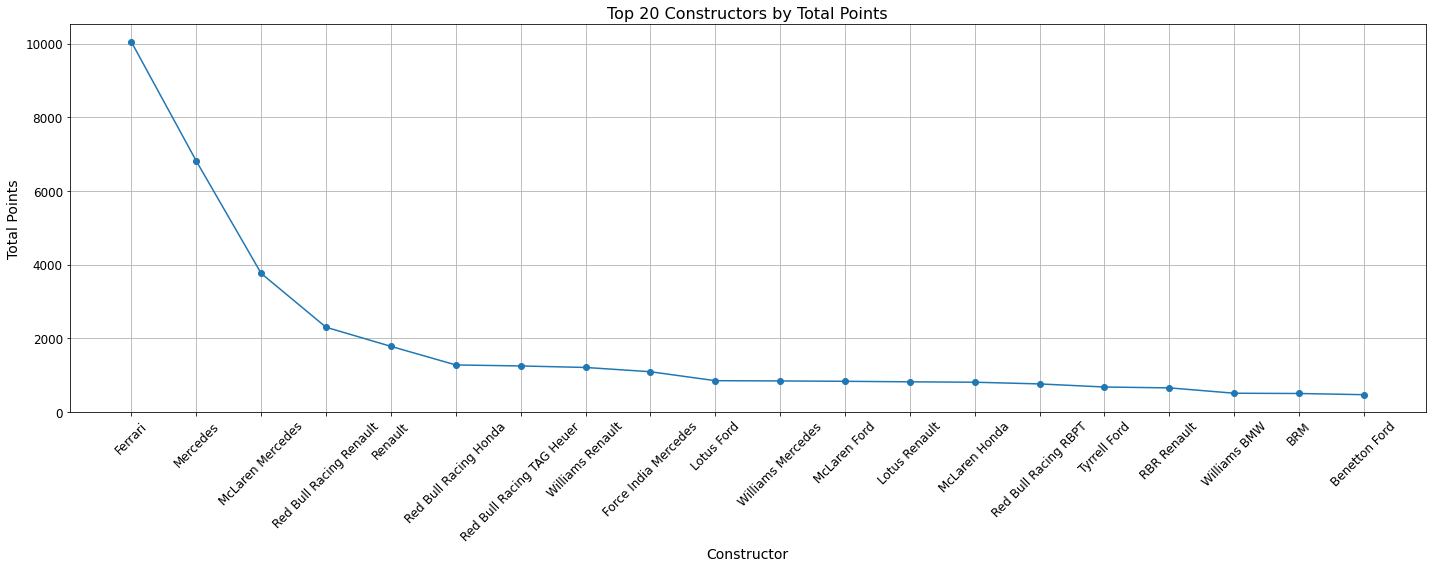

In [0]:
import matplotlib.pyplot as plt

# Calculate total points by constructors team
team_points = driver_details_df.groupby('Car')['PTS'].sum().reset_index()

# Sort by total points and select the top 20
team_points_sorted = team_points.sort_values('PTS', ascending=False).head(20)

# Line chart
plt.figure(figsize=(20, 8))
plt.plot(team_points_sorted['Car'], team_points_sorted['PTS'], marker='o')
plt.xlabel('Constructor', fontsize=14)
plt.ylabel('Total Points', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Top 20 Constructors by Total Points', fontsize=16)
plt.tight_layout()
plt.grid()
plt.show()


In [0]:
# Group the driver_details_df DataFrame by 'Driver' and sum the 'PTS' column for each driver
driver_points_df = driver_details_df.groupby('Driver')['PTS'].sum().reset_index()

# Sort the resulting DataFrame by the 'PTS' column in descending order and select the top 10 rows
top_drivers_df = driver_points_df.sort_values('PTS', ascending=False).head(10)

# Print the top 10 drivers ever with highest points scored
print(top_drivers_df)


                  Driver     PTS
215      Lewis Hamilton   4405.5
344    Sebastian Vettel   3098.0
102     Fernando Alonso   2061.0
245      Max Verstappen   2011.5
210      Kimi R�ikk�nen   1873.0
264        Nico Rosberg   1594.5
247  Michael Schumacher   1566.0
63     Daniel Ricciardo   1311.0
166       Jenson Button   1235.0
349        Sergio Perez   1201.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Grand Prix  1077 non-null   object
 1   Initials    1077 non-null   object
 2   Driver      1077 non-null   object
 3   Car         1077 non-null   object
 4   Time        1077 non-null   object
 5   Year        1077 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 46.4+ KB


<command-1388013028079601>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lap_times['Laps'] = df_lap_times['Laps'] * 60


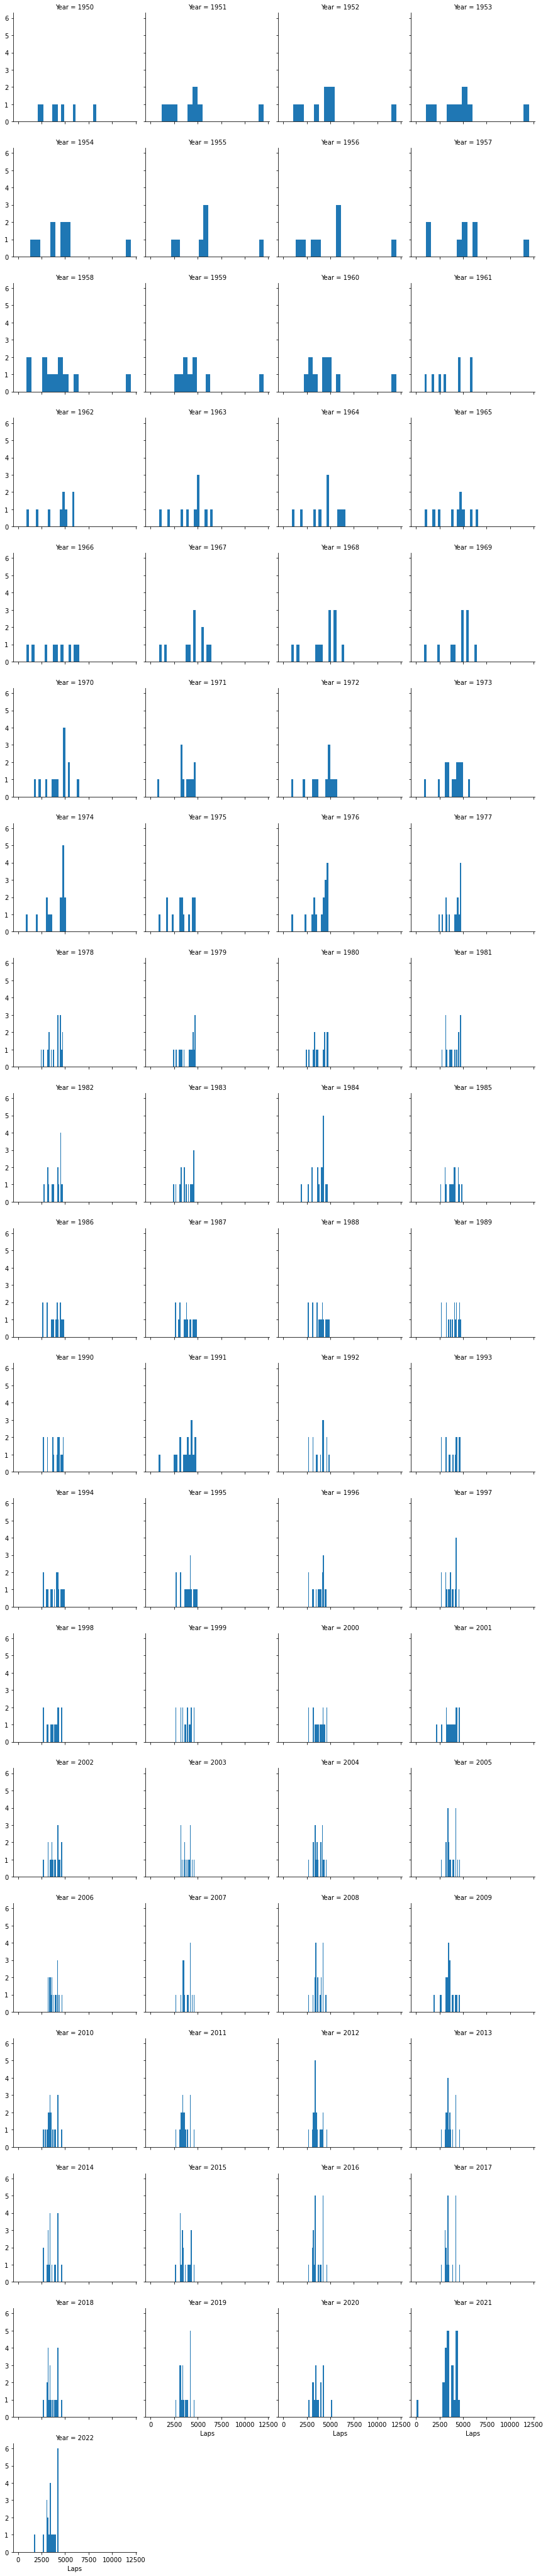

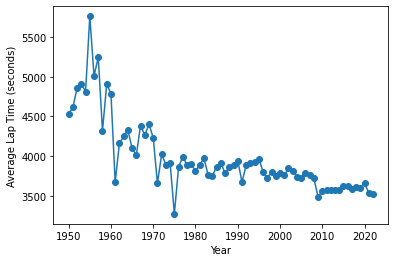

In [0]:
import pandas as pd
# from summarytools import dfSummary
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
df_lap_times = races_details_df[['Laps', 'Year']]
df_lap_times['Laps'] = df_lap_times['Laps'] * 60
g = sns.FacetGrid(df_lap_times, col='Year', col_wrap=4, height=3, margin_titles=True)
g.map(plt.hist, 'Laps', bins=20)
avg_lap_times = df_lap_times.groupby('Year').mean()
plt.figure()
plt.plot(avg_lap_times.index, avg_lap_times['Laps'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Lap Time (seconds)')
plt.show()


In [0]:
df_driver_points = driver_details_df.groupby('Driver')['PTS'].sum().reset_index()
df_driver_points = df_driver_points.sort_values('PTS', ascending=False)
top_drivers = df_driver_points.head(10)
df_fastest_laps = fastest_laps_df
top_drivers_laps = pd.merge(top_drivers, df_fastest_laps, on='Driver')
fig = px.line(top_drivers_laps, x='Year', y='PTS', color='Driver', title='Top Drivers by Points')
fig.show()



In [0]:
race_counts = races_details_df['Year'].value_counts()
fig = px.bar(x=race_counts.index, y=race_counts.values, labels={'x':'Year', 'y':'Number of Races'})
fig.update_layout(title='Number of Grand Prix Races per Year')
fig.show()

#display(driver_details_df.isnull().sum())
#display(fastest_laps_df.isnull().sum())
#display(races_details_df.isnull().sum())

In [0]:
df_winners = races_details_df.groupby(['Driver', 'Car']).size().reset_index(name='Wins')
df_winners = df_winners.sort_values(by=['Wins'], ascending=False)
fig = px.scatter(df_winners, x="Wins", y="Driver", color="Car", size="Wins", hover_name="Car",
                 hover_data={"Wins": True},
                 title="Most Successful Drivers and Teams in Terms of Race Wins",
                 labels={"Wins": "Race Wins", "Winner": "Driver"})
fig.update_layout(xaxis_title="Race Wins", yaxis_title="Driver", legend_title="Team")
fig.show()